# **1**

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import math


In [23]:
A = np.array([[2, 5, 4],
              [6, 3, 0]])

A_T_A = A.T @ A

A_T_A

array([[40, 28,  8],
       [28, 34, 20],
       [ 8, 20, 16]])

In [24]:
# Calculate eigenvalues and eigenvectors for A^T*A and A*A^T
eigenvalues_A_T_A, eigenvectors_A_T_A = np.linalg.eig(A_T_A)

# Organize eigenvalues and eigenvectors by decreasing order of eigenvalues
sorted_indices_A_T_A = np.argsort(eigenvalues_A_T_A)[::-1]
sorted_eigenvalues_A_T_A = eigenvalues_A_T_A[sorted_indices_A_T_A]
sorted_eigenvectors_A_T_A = eigenvectors_A_T_A[:, sorted_indices_A_T_A]


(sorted_eigenvalues_A_T_A, sorted_eigenvectors_A_T_A)

(array([7.20000000e+01, 1.80000000e+01, 1.59612142e-15]),
 array([[-0.66666667, -0.66666667,  0.33333333],
        [-0.66666667,  0.33333333, -0.66666667],
        [-0.33333333,  0.66666667,  0.66666667]]))

In [25]:
# Calculate singular values by taking the square root of positive eigenvalues
singular_values = np.sqrt(sorted_eigenvalues_A_T_A[sorted_eigenvalues_A_T_A > 0])

# Create the Sigma matrix with the correct dimensions
Sigma = np.zeros(A.shape)
np.fill_diagonal(Sigma, singular_values)

singular_values, Sigma

(array([8.48528137e+00, 4.24264069e+00, 3.99514883e-08]),
 array([[8.48528137, 0.        , 0.        ],
        [0.        , 4.24264069, 0.        ]]))

In [26]:
import numpy as np
from sympy import symbols, Matrix, det

# Define the matrix A^T*A again after the reset
A = np.array([[2, 5, 4], [6, 3, 0]])
A_T_A = np.dot(A.T, A)

# Define the variable for eigenvalues
lambda_symbol = symbols('lambda')

# Matrix lambda*I - A^T*A
characteristic_matrix = lambda_symbol * np.eye(3) - A_T_A

# Convert to a sympy Matrix to calculate the determinant and simplify the expression
characteristic_matrix_sympy = Matrix(characteristic_matrix)
characteristic_polynomial = characteristic_matrix_sympy.det()

# Simplify and expand the characteristic polynomial
characteristic_polynomial_expanded = characteristic_polynomial.expand()
characteristic_polynomial_expanded


1.0*lambda**3 - 90.0*lambda**2 + 1296.0*lambda

In [27]:
AtA = sp.Matrix([[-32,28,8],
                 [28,-38,20],
                 [8,20,-56]])

rref_AtA, pivot_columns = AtA.rref()

print("Reduced Row Echelon Form of A:\n", rref_AtA)
print("Pivot columns:", pivot_columns)

Reduced Row Echelon Form of A:
 Matrix([[1, 0, -2], [0, 1, -2], [0, 0, 0]])
Pivot columns: (0, 1)


In [28]:
AtA = sp.Matrix([[22,28,8],
                 [28,16,20],
                 [8,20,-2]])

rref_AtA, pivot_columns = AtA.rref()

print("Reduced Row Echelon Form of A:\n", rref_AtA)
print("Pivot columns:", pivot_columns)

Reduced Row Echelon Form of A:
 Matrix([[1, 0, 1], [0, 1, -1/2], [0, 0, 0]])
Pivot columns: (0, 1)


In [29]:
AtA = sp.Matrix([[40,28,8],
                 [28,34,20],
                 [8,20,16]])

rref_AtA, pivot_columns = AtA.rref()

print("Reduced Row Echelon Form of A.T*A:\n", rref_AtA)
print("Pivot columns:", pivot_columns)

Reduced Row Echelon Form of A.T*A:
 Matrix([[1, 0, -1/2], [0, 1, 1], [0, 0, 0]])
Pivot columns: (0, 1)


In [30]:
V1 = np.array([2,2,1])
V2 = np.array([-2,1,2])
V3 = np.array([1,-2,2])

u1 = A @ (V1/np.linalg.norm(V1)) / singular_values[0]
u2 = A @ (V2/np.linalg.norm(V2)) / singular_values[1]

u1, u2

(array([0.70710678, 0.70710678]), array([ 0.70710678, -0.70710678]))

# **4**

In [31]:
from scipy.linalg import sqrtm

A = np.array([[1,2],
              [2,1]])

B = np.array([[3,-1],
              [-1,3]])

U, S, Vt = np.linalg.svd(A@A + B)

X = -A + sqrtm(A@A + B)

X ,U , S, Vt

(array([[ 1.77634638, -1.45972159],
        [-1.45972159,  1.77634638]]),
 array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]),
 array([11.,  5.]),
 array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]))

In [32]:
L = np.linalg.cholesky(A@A + B)
U, S, Vt = np.linalg.svd(L)
radical_A2plusB = Vt.T @ S @ Vt

X = -A + radical_A2plusB

print(X)

[[2.31662479 0.23606798]
 [1.31662479 1.23606798]]


In [33]:
L = np.array([[math.sqrt(55/8),0],
              [math.sqrt(9/8),math.sqrt(8)]])
U, S, Vt = np.linalg.svd(L)
radical_A2plusB = Vt.T @ S @ Vt

X = -A + radical_A2plusB

print(X)

[[2.31662479 0.23606798]
 [1.31662479 1.23606798]]


# **6**

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
def svd(A:np.array):
  m = A.shape[0]
  n = A.shape[1]

  eigenvalues, V = np.linalg.eig(A.T@A)
  idx = eigenvalues.argsort()[::-1]
  eigenvalues = eigenvalues[idx]
  V = V[:, idx]
  S = np.zeros(n)
  U = np.zeros((m,n))

  for index in range(len(eigenvalues)):
    S[index] = np.sqrt(eigenvalues[index])

  for i in range(len(S)):
        U[:, i] = (A @ V[:, i]) / S[i]

  return U,S, V.T

A = np.array([[1,2,3],
              [1,2,3]])

U, Sigma, Vt = svd(A)

print("-------------------U-------------------")
print(U)
print("\n--------------Sigma----------------")
print(Sigma)
print("\n-------------V transpose---------------")
print(Vt)


newSigma = np.zeros(A.shape)
np.fill_diagonal(newSigma, Sigma)

print("\n-------------A---------------")
print(A)



-------------------U-------------------
[[7.07106781e-01 2.92913392e-08            nan]
 [7.07106781e-01 2.92913392e-08            nan]]

--------------Sigma----------------
[5.29150262e+00 2.27416647e-08            nan]

-------------V transpose---------------
[[ 0.26726124  0.53452248  0.80178373]
 [-0.10729925 -0.81036844  0.57601204]
 [ 0.80696533 -0.57890429  0.11694775]]

-------------A---------------
[[1 2 3]
 [1 2 3]]


<ipython-input-35-4f7a8c6a0611>:13: RuntimeWarning: invalid value encountered in sqrt
  S[index] = np.sqrt(eigenvalues[index])


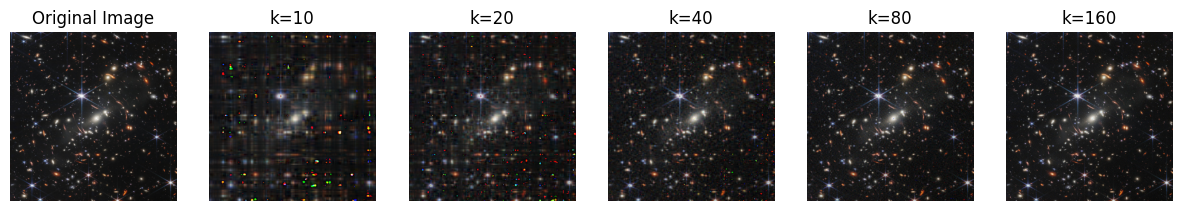

{10: 0.9809686108714096,
 20: 0.9619372217428194,
 40: 0.9238744434856387,
 80: 0.8477488869712775,
 160: 0.6954977739425549}

In [37]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def svd(A: np.array):
    m = A.shape[0]
    n = A.shape[1]

    eigenvalues, V = np.linalg.eig(A.T @ A)
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    V = V[:, idx]
    S = np.zeros(n)
    U = np.zeros((m, n))

    for index in range(len(eigenvalues)):
        S[index] = np.sqrt(eigenvalues[index])

    for i in range(len(S)):
        U[:, i] = (A @ V[:, i]) / S[i]

    return U, S, V.T

def load_and_convert_image(image_path):
    original_image = Image.open(image_path)
    return np.array(original_image, dtype=float)

def reconstruct_image(U, Sigma, Vt, k):
    # Truncate the matrices
    S_k = np.zeros((k, k))
    np.fill_diagonal(S_k, Sigma[:k])
    U_k = U[:, :k]  # m x k
    Vt_k = Vt[:k, :]  # k x n

    # Perform matrix multiplication
    return U_k @ S_k @ Vt_k

def apply_svd_to_image_channels(image_array, k_values):
    channels = []
    for channel in range(image_array.shape[2]):
        A = image_array[:, :, channel]
        U, Sigma, Vt = svd(A)
        reconstructed_images = [reconstruct_image(U, Sigma, Vt, k) for k in k_values]
        channels.append(reconstructed_images)
    return channels

def combine_channels(reconstructed_channels, k_values):
    combined_images = []
    for i in range(len(k_values)):
        combined_image = np.stack([channel[i] for channel in reconstructed_channels], axis=2)
        combined_images.append(combined_image)
    return combined_images

def display_images(original, reconstructed, k_values):
    fig, axs = plt.subplots(1, len(reconstructed) + 1, figsize=(15, 10))
    axs[0].imshow(original.astype(np.uint8))
    axs[0].title.set_text('Original Image')
    axs[0].axis('off')
    for i, img in enumerate(reconstructed):
        axs[i+1].imshow(img.astype(np.uint8))
        axs[i+1].title.set_text(f'k={k_values[i]}')
        axs[i+1].axis('off')
    plt.show()

def calculate_space_savings(original_size, compressed_size):
    return 1 - (compressed_size / original_size)

def svd_on_channels(image_array, k):
    reconstructed_channels = []
    sizes = []
    for i in range(3):  # Assuming RGB image
        U, S, Vt = svd(image_array[:, :, i])
        U_k = U[:, :k]
        S_k = S[:k]
        Vt_k = Vt[:k, :]
        reconstructed_channel = U_k @ np.diag(S_k) @ Vt_k
        reconstructed_channels.append(reconstructed_channel)
        sizes.append((U_k.size + S_k.size + Vt_k.size) * U_k.itemsize)
    reconstructed_image = np.stack(reconstructed_channels, axis=-1)
    return reconstructed_image, sum(sizes)

# Main code
image_path = '/content/drive/My Drive/IMG_6371.JPG'
image_array = load_and_convert_image(image_path)
original_size = image_array.size * image_array.itemsize  # Total bytes used by the original image

k_values = [10, 20, 40, 80, 160]
space_savings = []

# Apply SVD and reconstruct the image with different k values
reconstructed_channels = apply_svd_to_image_channels(image_array, k_values)
reconstructed_images = combine_channels(reconstructed_channels, k_values)

# Calculate space savings for each k
for k in k_values:
    _, compressed_size = svd_on_channels(image_array, k)
    space_savings.append(calculate_space_savings(original_size, compressed_size))

# Display the images and print space savings
display_images(image_array, reconstructed_images, k_values)

# Print space savings for each k
space_savings_results = {k: savings for k, savings in zip(k_values, space_savings)}
space_savings_results


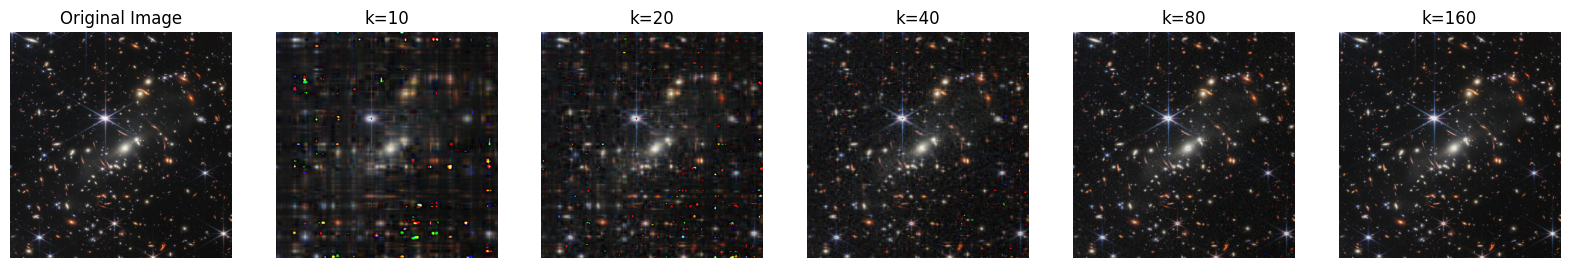

Space savings for k=10: 99.36%
Space savings for k=20: 98.72%
Space savings for k=40: 97.42%
Space savings for k=80: 94.73%
Space savings for k=160: 89.08%


In [38]:
def load_image(image_path):
    original_image = Image.open(image_path)
    return np.array(original_image, dtype=float)

def apply_svd(image_array, k):
    U, S, Vt = np.linalg.svd(image_array, full_matrices=False)
    U_k = U[:, :k]
    S_k = np.diag(S[:k])
    Vt_k = Vt[:k, :]
    reconstructed = U_k @ S_k @ Vt_k
    return reconstructed, U_k, S_k, Vt_k

def svd_on_channels(image_array, k):
    reconstructed_channels = []
    sizes = []
    for i in range(3):  # Assuming RGB image
        reconstructed_channel, U_k, S_k, Vt_k = apply_svd(image_array[:, :, i], k)
        reconstructed_channels.append(reconstructed_channel)
        sizes.append((U_k.size + S_k.size + Vt_k.size) * U_k.itemsize)
    reconstructed_image = np.stack(reconstructed_channels, axis=-1)
    return reconstructed_image, sum(sizes)

def calculate_space_savings(original_size, compressed_size):
    return 1 - (compressed_size / original_size)

image_path = '/content/drive/My Drive/IMG_6371.JPG'
image = load_image(image_path)
original_size = image.size * image.itemsize * 3  # Total bytes used by the original image

k_values = [10, 20, 40, 80, 160]
space_savings = []

fig, axs = plt.subplots(1, len(k_values) + 1, figsize=(20, 4))
axs[0].imshow(image.astype(np.uint8))
axs[0].set_title('Original Image')
axs[0].axis('off')

for i, k in enumerate(k_values):
    reconstructed, compressed_size = svd_on_channels(image, k)
    axs[i+1].imshow(reconstructed.astype(np.uint8))
    axs[i+1].set_title(f'k={k}')
    axs[i+1].axis('off')
    space_savings.append(calculate_space_savings(original_size, compressed_size))

plt.show()

# Print space savings for each k
for k, savings in zip(k_values, space_savings):
    print(f'Space savings for k={k}: {savings:.2%}')
